In [1]:
import pandas as pd
pd.options.display.max_columns = 100
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
houses =pd.read_table('AmesHousing_1.txt')
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
houses['Land Slope'].value_counts(dropna = False)

Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64

In [4]:
houses['Roof Style'].value_counts(dropna=False)

Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: Roof Style, dtype: int64

In [5]:
houses['Kitchen AbvGr'].value_counts().sort_index()

0       3
1    2796
2     129
3       2
Name: Kitchen AbvGr, dtype: int64

## The most frequent value in the distribution is called the mode.
## Mode is ideal for ordinal data represented using words. The mode is also a good choice for nominal data.

In [6]:
def get_mode(a):
    freq = {}
    for data in a:
        if data in freq:
            freq[data] += 1
        else:
            freq[data] = 1
    #return sorted(freq, key= lambda x : freq.get(x))[-1]
    return max(freq, key = freq.get)

In [7]:
mode_function = get_mode(houses['Land Slope'])
mode_function

'Gtl'

In [8]:
houses['Roof Style'].value_counts().max()

2321

In [9]:
houses['Bedroom AbvGr'].value_counts().sort_index()

0       8
1     112
2     743
3    1597
4     400
5      48
6      21
8       1
Name: Bedroom AbvGr, dtype: int64

## There are distributions that can have more than one mode. [0,1,1,1,2,2,2,3] has two modes (1 and 2), this distributon is called bimodal.
## If the distribution had only one mode, it's called unimodal.
## More than two modes, called multimodal.
## Also have cases there is no mode at all [1,1,2,2,3,3,4,4]
## Distributions without a mode are often specific to continuous variables.
## The workaround is to organize the continuous variable in a grouped frequency table, and select for the mode the midpoint of the class interval (the bin) with highest frequency.

In [10]:
intervals = pd.interval_range(start=0, end=800000, freq=100000)
gr_freq_table = pd.Series([0] * 8, index = intervals)
for value in houses.SalePrice:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break
#houses.SalePrice.value_counts(bins = 10).sort_index()
print(gr_freq_table)

(0, 100000]          252
(100000, 200000]    1821
(200000, 300000]     627
(300000, 400000]     166
(400000, 500000]      47
(500000, 600000]      11
(600000, 700000]       4
(700000, 800000]       2
dtype: int64


## Plot a histogram of a kde plot of a distribution, the mode will always be the peak of the distribution.

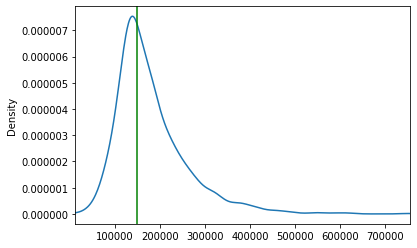

In [11]:
houses.SalePrice.plot.kde(xlim = (houses.SalePrice.min(), houses.SalePrice.max()))
plt.axvline(150000, color = 'Green')

### General prediction for a right - skewed distributon
* 1. Most values are concentrated in the left body of the distribution where they will form a peak - this is where the mode will be.
* 2. The median divides a distribution in two halves of equal length. For this reason, the median is usually positional slightly right from the peak (the mode) for a right - skewed distribution.
* 3. The mean takes into account each value in the distribution, and it will be affected by the outliers in the right tail. This will generally pull the mean to the right of the median.
***
### So in a right skewed distribution, the mean will usually be to the right of the median, and the median will be to the right of the mode.
### For a left - skewed distribution, the direction is simply reversed: the mean is positioned to the left of the median, and the median to the left of the mode.

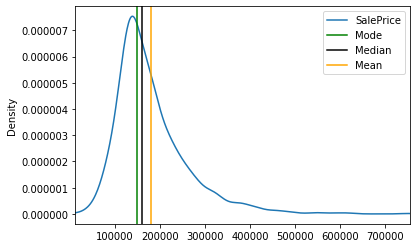

In [12]:
houses.SalePrice.plot.kde(xlim = (houses.SalePrice.min(), houses.SalePrice.max()))
plt.axvline(150000, color = 'Green', label = 'Mode')
plt.axvline(houses.SalePrice.median(), color = 'Black', label='Median')
plt.axvline(houses.SalePrice.mean(), color = 'Orange', label = 'Mean')
plt.legend()
plt.show()

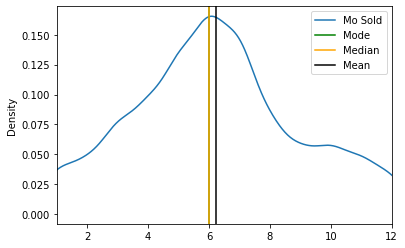

In [13]:
houses['Mo Sold'].plot.kde(xlim = (1,12))
plt.axvline(houses['Mo Sold'].mode()[0], color = 'Green', label = 'Mode')
plt.axvline(houses['Mo Sold'].median(), color = 'Orange', label = 'Median')
plt.axvline(houses['Mo Sold'].mean(), color = 'Black', label = 'Mean')
plt.legend()
plt.show()

In [14]:
houses['Mo Sold'].value_counts().sort_index()

1     123
2     133
3     232
4     279
5     395
6     505
7     449
8     233
9     161
10    173
11    143
12    104
Name: Mo Sold, dtype: int64

***
***
# Measures of Variability
### *range(X)*  = *max(X)* $\ -$  *min(X)* 

In [15]:
def get_range(a):
    return max(a) - min(a)

In [16]:
year_price = houses.pivot_table(index = 'Yr Sold', values = ['SalePrice'], aggfunc=[np.max, np.min]).reset_index()
year_price.columns = ['Year', 'High', 'Low']
year_price['Price Range'] = year_price.High - year_price.Low
year_price

,Year,High,Low,Price Range
0,2006,625000,35000,590000
1,2007,755000,39300,715700
2,2008,615000,13100,601900
3,2009,610000,34900,575100
4,2010,611657,12789,598868


In [17]:
#range_2006 = get_range(houses.loc[houses['Yr Sold'] == 2006, 'SalePrice'])
range_by_year = {}
years = houses['Yr Sold'].unique()
for year in years:
    range_by_year[year] = get_range(houses.loc[houses['Yr Sold'] == year, 'SalePrice'])
range_by_year

{2010: 598868, 2009: 575100, 2008: 601900, 2007: 715700, 2006: 590000}

In [18]:
houses['Yr Sold'].unique()

array([2010, 2009, 2008, 2007, 2006])

## 1. \begin{equation}
mean\ absolute \ distance = \frac{
\left|x_1 - \mu\right| +
\left|x_2 - \mu\right| +
... +
\left|x_N - \mu\right|
}{N} = \frac{
\displaystyle\sum_{i = 1}^{N}
\left|x_i - \mu\right|
}
{N}
\end{equation}
***

## In statistical jargon, the distance of a value from the mean is called deviation.
## The mean absolute distance is more commonly known as mean absolute deviation or average absolute deviation

## 2. \begin{equation}
mean\ squared \ distance = \frac{
(x_1 - \mu)^2 +
(x_2 - \mu)^2 +
... +
(x_N - \mu)^2
}{N} = \frac{
\displaystyle\sum_{i = 1}^{N}
(x_i - \mu)^2
}
{N}
\end{equation}

## Mean squared distance or mean squared deviation, which is more commonly known as #variance
***
## Squaring the distances or taking their absolute values ensure that we get a variability value that is greater than 0 for all distributions that show some variability.
## Variance and mean absolute deviation will still be 0 for distribution that show no variability.
## The square root of variance is called standard deviation
## \begin{equation}
standard\ deviation = \sqrt{
\frac{
(x_1 - \mu)^2 +
(x_2 - \mu)^2 +
... +
(x_N - \mu)^2
}{N}
}
= \sqrt{
\frac{
\displaystyle\sum_{i = 1}^{N}
(x_i - \mu)^2
}
{N}
}
\end{equation}
## \begin{equation}
standard\ deviation = \sqrt{variance}
\end{equation}
***
## Standard deviation tells us how much the values in a distribution  vary(on average) around the mean of that distribution.

In [19]:
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
        
    variance = sum(distances) / len(distances)
    
    return np.sqrt(variance)
print(standard_deviation(houses.SalePrice))
print(houses.SalePrice.mean())

79873.05865192247
180796.0600682594


* The average price of a house is roughly 180,796, on average, sale prices vary by roughly 79873 above and below a mean of $180796.

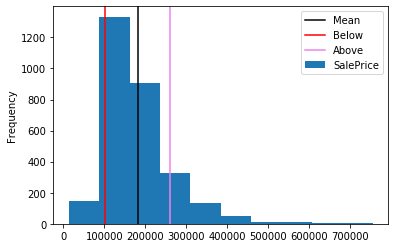

In [20]:
mean = houses.SalePrice.mean()
st_dev = standard_deviation(houses.SalePrice)
houses.SalePrice.plot.hist()
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean - st_dev, color = 'Red', label = 'Below')
plt.axvline(mean + st_dev, color = 'Violet', label = 'Above')
plt.legend()
plt.show()

In [21]:
years = houses['Yr Sold'].unique()
year_std_dev = {}
for year in years:
    price_array = houses[houses['Yr Sold'] == year].SalePrice
    std_dev = standard_deviation(price_array)
    year_std_dev[year] = std_dev
year_std_dev
greatest_variability = max(year_std_dev, key = year_std_dev.get)
greatest_variability

2006

In [22]:
for i in range(1,5):
    sample = houses.SalePrice.sample(50, random_state=i)
    st_dev = standard_deviation(sample)
    print('Sample ' + str(i) + ': ' + str(st_dev))

Sample 1: 81785.0811515768
Sample 2: 100370.62998094413
Sample 3: 60676.038515710636
Sample 4: 64436.40016450328


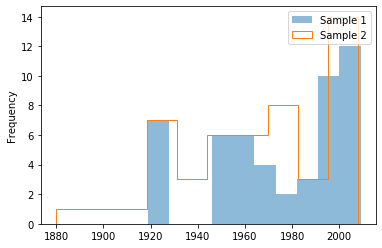

In [23]:
#plt.style.use('fivethirtyeight')
sample1 = houses['Year Built'].sample(50, random_state = 1)
sample2 = houses['Year Built'].sample(50, random_state = 2)

sample1.plot.hist(label = 'Sample 1', alpha = 0.5)
sample2.plot.hist(label = 'Sample 2', histtype = 'step')
plt.grid(False)
plt.legend()

In [24]:
std_list = []
for i in range(5000):
    sample = houses.SalePrice.sample(10, random_state=i)
    std_list.append(standard_deviation(sample))

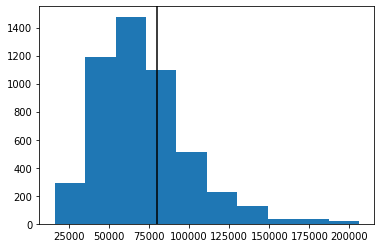

In [25]:
plt.hist(std_list)
plt.axvline(standard_deviation(houses.SalePrice), color = 'Black')

* Most sample standard deviations are clustered below the population SD.
* Which means the standard deviation usually underestimates the population standard deviation.

In [26]:
print(sum(std_list) / 5000)

71303.64762671624


In [27]:
print(standard_deviation(houses.SalePrice))

79873.05865192247


* Mean of the 5000 sample standard deviation is below the population standard deviation.
## Sample standard deviation underestimates on average the population standard deviation.
## When we sample a population, it's generally more likely to get a sample with a spread that's lower than the population's spread. This generally translates to a lower standard deviation than in the population.
<img src="s2m4_less_var.svg">
* Getting a sample with a higher standard deviation than in the population is possible, but this is less likely, which is mostly specific to samples with a high spread and no clusters.
<img src='s2m4_more_var.svg'>
*** 
## To correct the underestimation problem, slightly modify the sample standard deviation formula to return higher values. 
## \begin{equation}
SD_{sample} = \sqrt{
\frac{
(x_1 - \bar{x})^2 +
(x_2 - \bar{x})^2 +
... +
(x_n - \bar{x})^2
}{n - 1}
}
= \sqrt{
\frac{
\displaystyle\sum_{i = 1}^{n}
(x_i - \bar{x})^2
}
{n - 1}
}
\end{equation}
## Bessel's correction

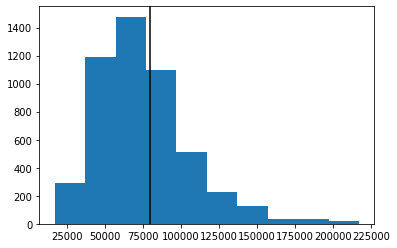

In [28]:
from math import sqrt
def bessel_standard_deviation(array):
    mean = sum(array) / len(array)
    deviation_square = [(value - mean) ** 2 for value in array]
    return sqrt(sum(deviation_square) / (len(array)-1))

std_devs = []
for i in range(5000):
    sample = houses.SalePrice.sample(10, random_state=i)
    std_devs.append(bessel_standard_deviation(sample))

plt.hist(std_devs)
plt.axvline(standard_deviation(houses.SalePrice), color = 'Black')

In [29]:
print(standard_deviation(houses.SalePrice))

79873.05865192247


In [30]:
print(sum(std_devs) / len(std_devs)) # With Bessel's correction

75160.6439928273


* The population standard deviation is denoted with **$\sigma$**, the population standard deviation $\sigma$ is just the square root of the population variance
\begin{equation}
\sigma = \sqrt{
\frac{
(x_1 - \mu)^2 +
(x_2 - \mu)^2 +
... +
(x_N - \mu)^2
}{N}
}
= \sqrt{
\frac{
\displaystyle\sum_{i = 1}^{N}
(x_i - \mu)^2
}
{N}
}
\end{equation}
\begin{equation}
\sigma^2 = \frac{
(x_1 - \mu)^2 +
(x_2 - \mu)^2 +
... +
(x_N - \mu)^2
}{N} = \frac{
\displaystyle\sum_{i = 1}^{N}
(x_i - \mu)^2
}
{N}
\end{equation}
* The sample standard deviation is denoted with s, sample variance s^2
\begin{equation}
s = \sqrt{
\frac{
(x_1 - \bar{x})^2 +
(x_2 - \bar{x})^2 +
... +
(x_n - \bar{x})^2
}{n - 1}
}
= \sqrt{
\frac{
\displaystyle\sum_{i = 1}^{n}
(x_i - \bar{x})^2
}
{n - 1}
}
\end{equation}
\begin{equation}
s^2 = \frac{
(x_1 - \bar{x})^2 +
(x_2 - \bar{x})^2 +
... +
(x_n - \bar{x})^2
}{n-1} = \frac{
\displaystyle\sum_{i = 1}^{n}
(x_i - \bar{x})^2
}
{n-1}
\end{equation}

In [31]:
sample = houses.sample(100, random_state=1)

In [32]:
pandas_stdev = sample.SalePrice.std()
numpy_stdev = np.std(sample.SalePrice, ddof = 1)
equal_stdevs = pandas_stdev == numpy_stdev
equal_stdevs

True

In [33]:
pandas_var = sample.SalePrice.var()
numpy_var = np.var(sample.SalePrice, ddof = 1)
equal_vars = pandas_var == numpy_var
equal_vars

True

## Statisticians agree that n - 1 is better than n or n-2 for compuing the sample standard deviation *s*. 
* An argument supporting this comes from the fact that the sample variance s^2 (which uses n -1) is an **unbiased esitmator** for the population variance $\sigma$^2. Since standard deviation is just the square root of variance, it makes sense to use n-1 as well (although standard deviation is not an unbiased estimator).
***
### A statistic is an unbiased estimator when that statistic is equal on average to the parameter it estimates.
### The sample mean $\bar x$ is an unbiased estimator for the population mean $\mu$ no matter we sample with or without replacement. 
### The sample varianve s^2 is an unbiased estimator for the population variance only when we sample with replacement, but the unbiasedness does not carry over to standard deviation.

In [34]:
population = [0, 3, 6]

samples = [[0,3], [0,6],
           [3,0], [3,6],
           [6,0], [6,3]
          ]
samples_replacement = [[0,3],[0,6],[0,0],
                      [3,0],[3,3],[3,6],
                      [6,0],[6,3],[6,6]]
pop_var = np.var(population, ddof = 0)
pop_std = np.std(population, ddof = 0)
print('Population variance is: {}, population standard deviation is {}.'.format(pop_var, pop_std))

Population variance is: 6.0, population standard deviation is 2.449489742783178.


In [35]:
st_devs = []
variances = []
for sample in samples:
    st_devs.append(np.std(sample, ddof = 1))
    variances.append(np.var(sample, ddof = 1))
mean_std = sum(st_devs) / len(st_devs)
mean_var = sum(variances) / len(variances)
print('Without replacement, all sample mean variance: {}, mean Std: {}'.format(mean_var, mean_std))

Without replacement, all sample mean variance: 9.0, mean Std: 2.82842712474619


In [36]:
st_devs = []
variances = []
for sample in samples_replacement:
    st_devs.append(np.std(sample, ddof = 1))
    variances.append(np.var(sample, ddof = 1))
mean_std = sum(st_devs) / len(st_devs)
mean_var = sum(variances) / len(variances)
print('With replacement, all sample mean variance: {}, mean Std: {}'.format(mean_var, mean_std))

With replacement, all sample mean variance: 6.0, mean Std: 1.8856180831641265


## Sample variance is an unbiased estimator for the population variance when sample from population is replacement. Although Std is still underestimated.

***
***
***
# Z-scores

In [38]:
print(houses.SalePrice.sample(1, random_state = 0))

2216    220000
Name: SalePrice, dtype: int64


## How far off from the mean a value of 220000 is in the distribution of the SalePrice variable.

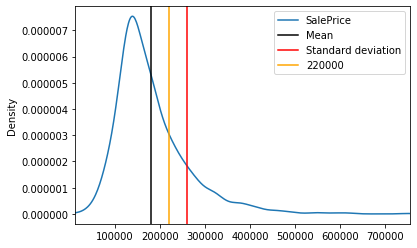

In [45]:
houses.SalePrice.plot.kde(xlim = (houses.SalePrice.min(), houses.SalePrice.max()))
plt.axvline(houses.SalePrice.mean(), color = 'Black', label = 'Mean')
plt.axvline(houses.SalePrice.mean() + houses.SalePrice.std(ddof = 0), color = 'Red', label = 'Standard deviation')
plt.axvline(220000, color = 'Orange', label = '220000')
plt.legend()
plt.show()